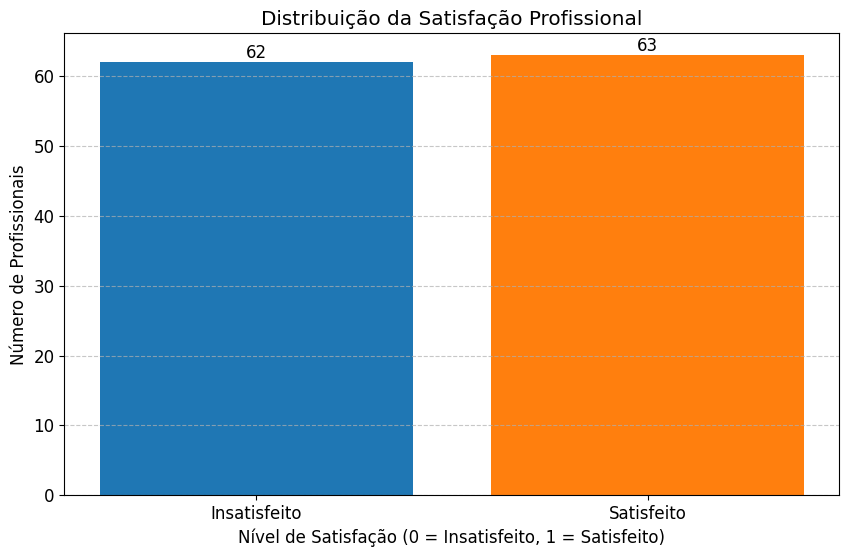

<ipython-input-13-17e24da00ce7>:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([insatisfeitos.dropna(), satisfeitos.dropna()],


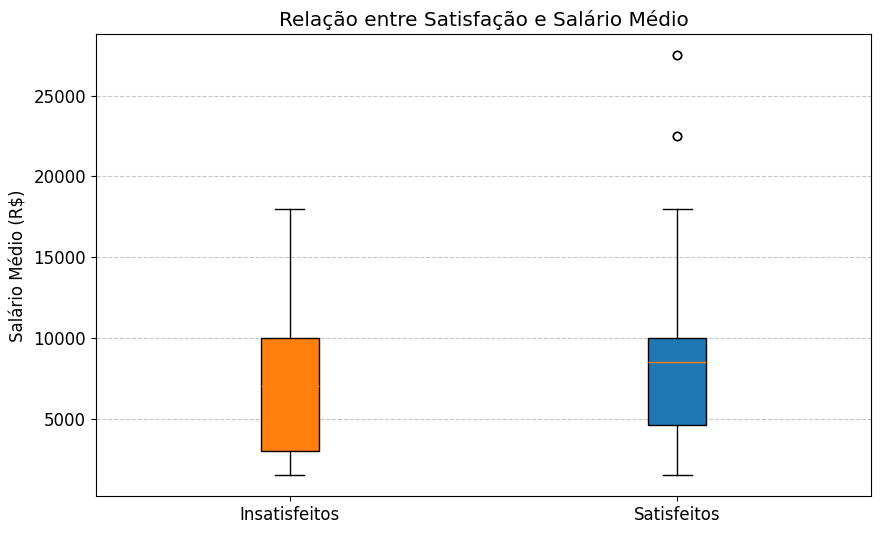

<ipython-input-13-17e24da00ce7>:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([exp_insatisfeitos.dropna(), exp_satisfeitos.dropna()],


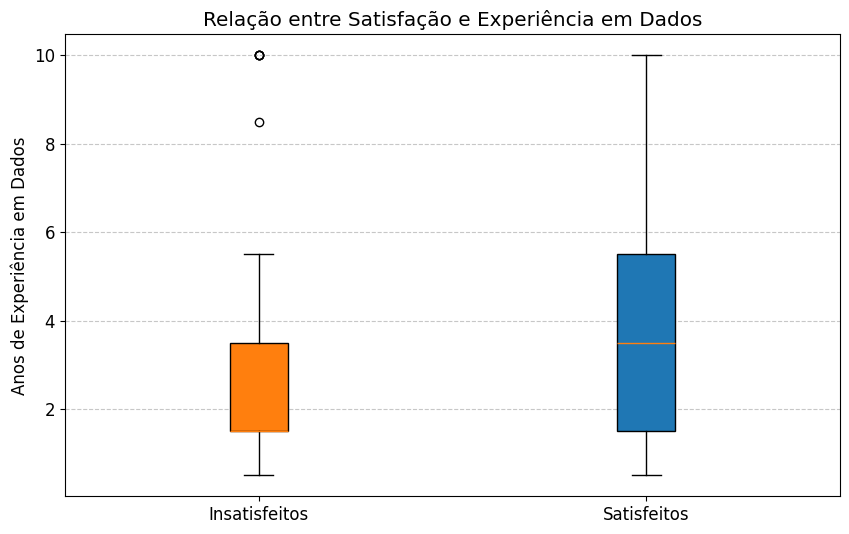

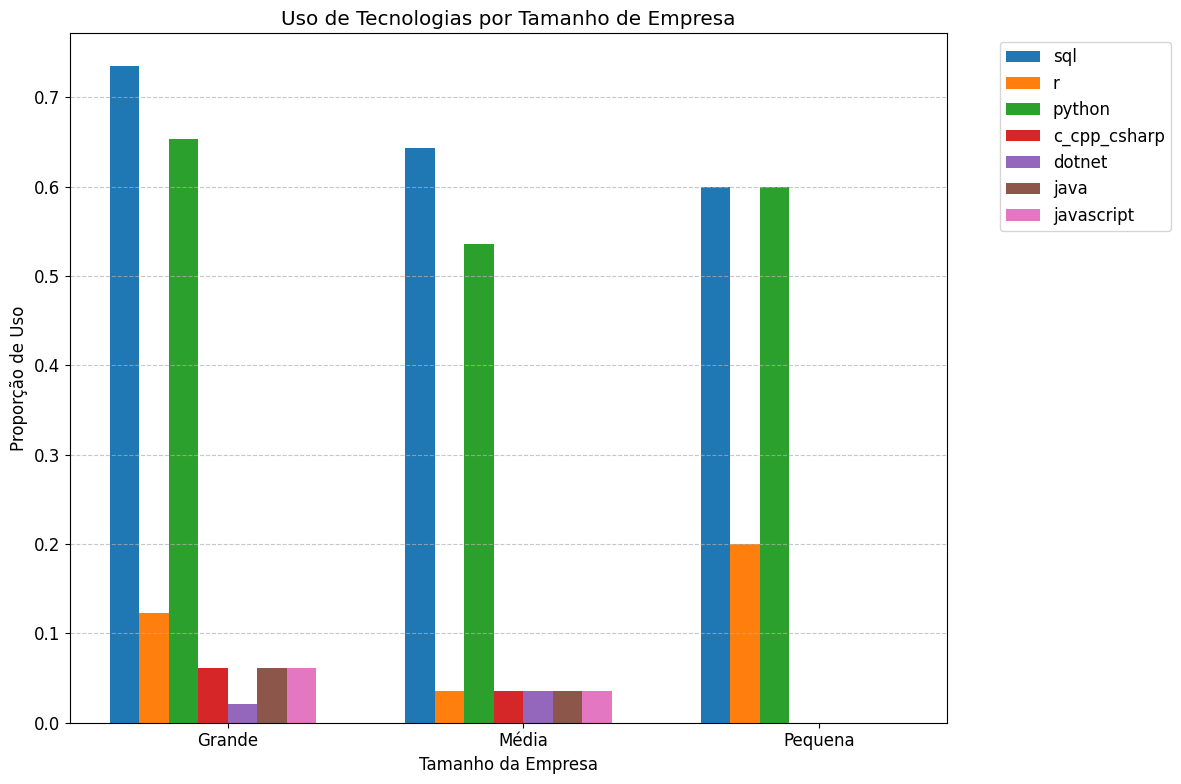

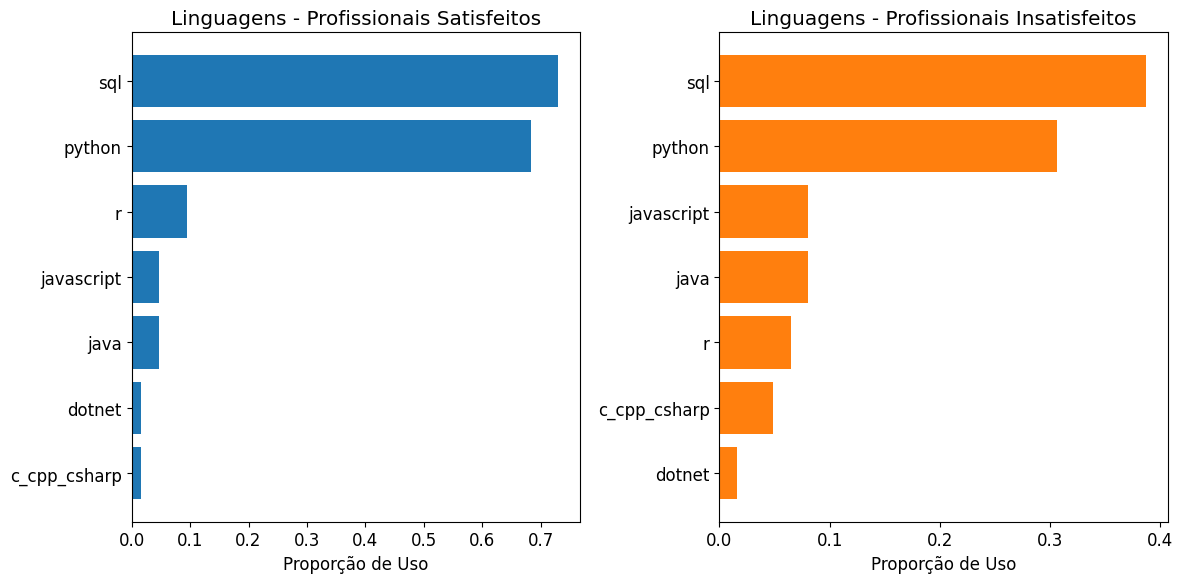

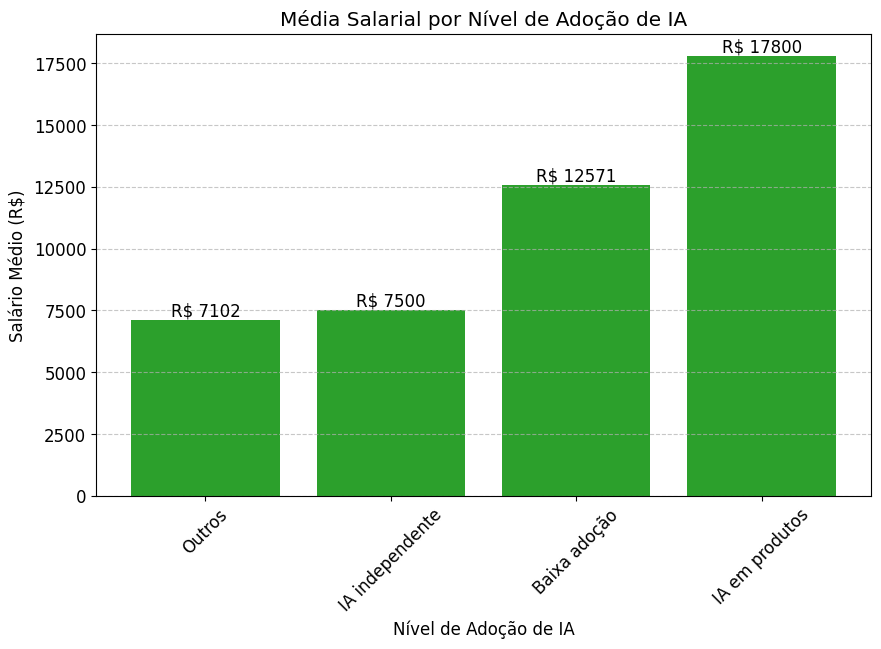

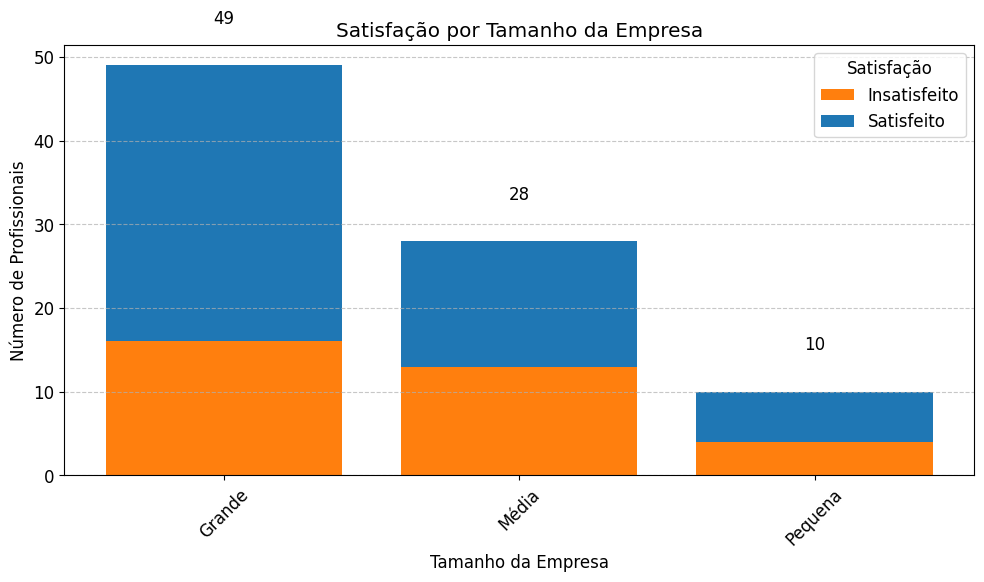

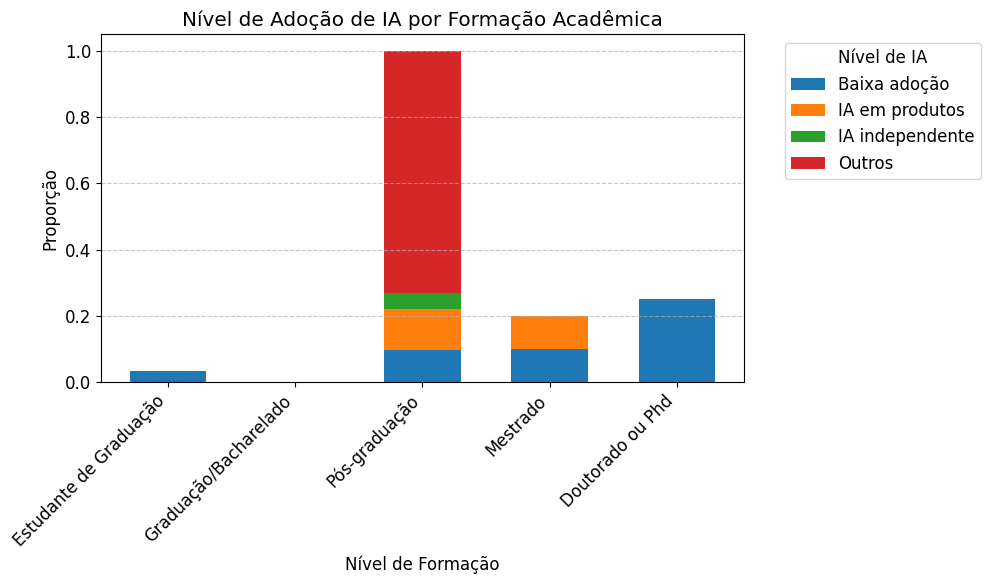

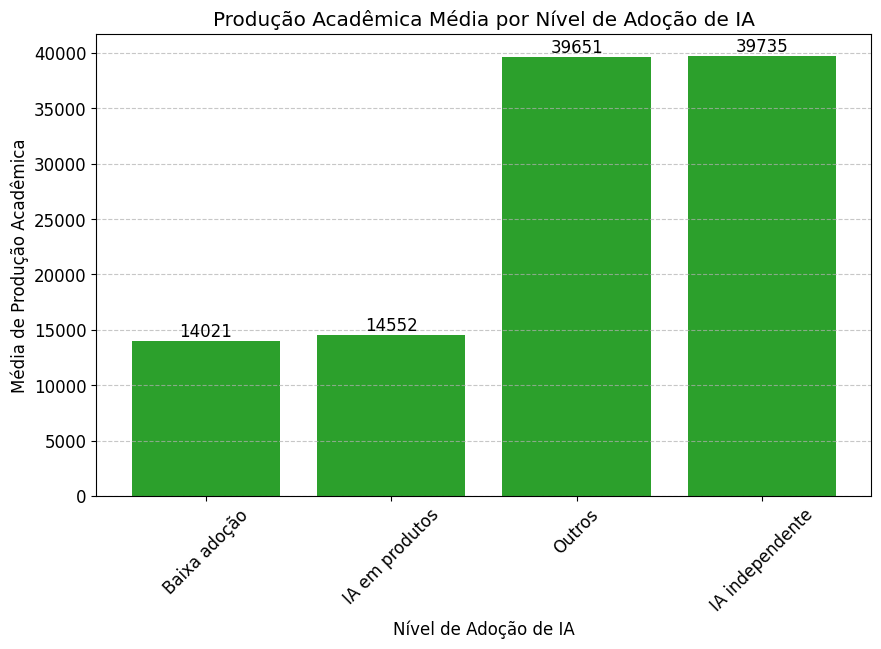

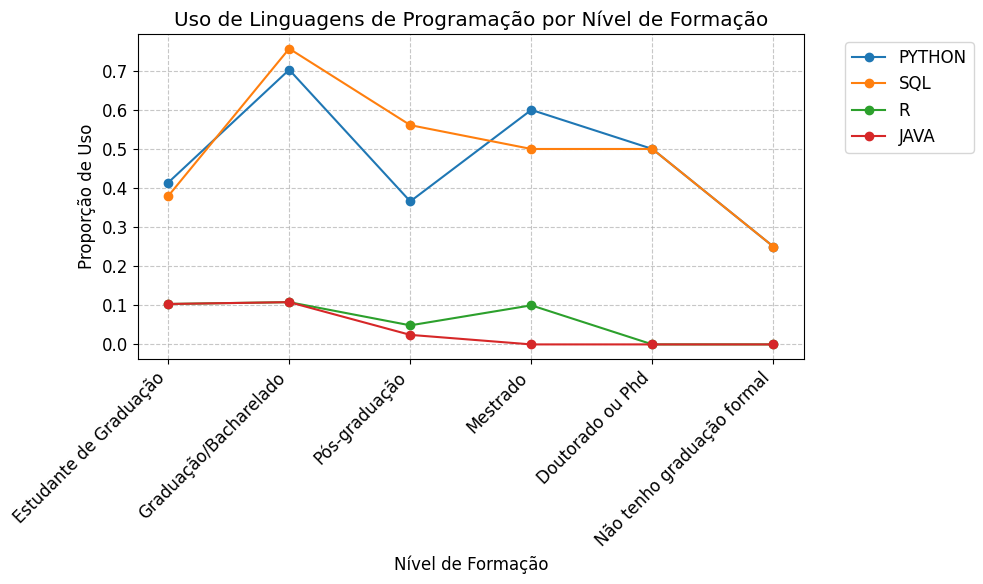

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('dados_unidos.csv')

# Configurações de estilo
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 1. Distribuição da Satisfação Profissional
satisfacao_counts = df['satisfacao_binaria'].value_counts()

plt.figure()
bars = plt.bar(satisfacao_counts.index, satisfacao_counts.values, color=['#ff7f0e', '#1f77b4'])
plt.title('Distribuição da Satisfação Profissional')
plt.xlabel('Nível de Satisfação (0 = Insatisfeito, 1 = Satisfeito)')
plt.ylabel('Número de Profissionais')
plt.xticks([0, 1], ['Insatisfeito', 'Satisfeito'])

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Relação entre satisfação e salário médio
plt.figure()
satisfeitos = df[df['satisfacao_binaria'] == 1]['salario_medio'].astype(float)
insatisfeitos = df[df['satisfacao_binaria'] == 0]['salario_medio'].astype(float)

box = plt.boxplot([insatisfeitos.dropna(), satisfeitos.dropna()],
                 patch_artist=True,
                 labels=['Insatisfeitos', 'Satisfeitos'])

# Cores das caixas
colors = ['#ff7f0e', '#1f77b4']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Relação entre Satisfação e Salário Médio')
plt.ylabel('Salário Médio (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Relação entre satisfação e experiência em dados
plt.figure()
exp_satisfeitos = df[df['satisfacao_binaria'] == 1]['exp_dados_num'].astype(float)
exp_insatisfeitos = df[df['satisfacao_binaria'] == 0]['exp_dados_num'].astype(float)

box = plt.boxplot([exp_insatisfeitos.dropna(), exp_satisfeitos.dropna()],
                 patch_artist=True,
                 labels=['Insatisfeitos', 'Satisfeitos'])

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Relação entre Satisfação e Experiência em Dados')
plt.ylabel('Anos de Experiência em Dados')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Tecnologias mais utilizadas por tamanho de empresa
tech_columns = ['sql', 'r', 'python', 'c_cpp_csharp', 'dotnet', 'java', 'javascript']
# Garantir que as colunas são numéricas
for col in tech_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

tech_by_size = df.groupby('tamanho_empresa_cat')[tech_columns].mean()

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
n_groups = len(tech_by_size)
n_tech = len(tech_columns)
index = np.arange(n_groups)
bar_width = 0.1

for i, tech in enumerate(tech_columns):
    plt.bar(index + i*bar_width, tech_by_size[tech], bar_width, label=tech)

plt.title('Uso de Tecnologias por Tamanho de Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Proporção de Uso')
plt.xticks(index + bar_width*(n_tech/2), tech_by_size.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Linguagens mais usadas por profissionais satisfeitos
lang_satisfied = df[df['satisfacao_binaria'] == 1][tech_columns].mean().sort_values()
lang_unsatisfied = df[df['satisfacao_binaria'] == 0][tech_columns].mean().sort_values()

# Gráfico comparativo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(lang_satisfied.index, lang_satisfied.values, color='#1f77b4')
plt.title('Linguagens - Profissionais Satisfeitos')
plt.xlabel('Proporção de Uso')

plt.subplot(1, 2, 2)
plt.barh(lang_unsatisfied.index, lang_unsatisfied.values, color='#ff7f0e')
plt.title('Linguagens - Profissionais Insatisfeitos')
plt.xlabel('Proporção de Uso')

plt.tight_layout()
plt.show()

# 6. Relação entre adoção de IA e salário
df['salario_medio'] = pd.to_numeric(df['salario_medio'], errors='coerce')
ia_adoption = df.groupby('nivel_ia')['salario_medio'].mean().sort_values()

plt.figure()
bars = plt.bar(ia_adoption.index, ia_adoption.values, color='#2ca02c')

plt.title('Média Salarial por Nível de Adoção de IA')
plt.xlabel('Nível de Adoção de IA')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R$ {int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Satisfação por Tamanho da Empresa
tamanho_counts = df.groupby(['tamanho_empresa_cat', 'satisfacao_binaria']).size().unstack()

plt.figure(figsize=(10, 6))
colors = ['#ff7f0e', '#1f77b4']
labels = ['Insatisfeito', 'Satisfeito']
bottom = np.zeros(len(tamanho_counts))

for i, col in enumerate(tamanho_counts.columns):
    plt.bar(tamanho_counts.index,
            tamanho_counts[col],
            bottom=bottom,
            label=labels[i],
            color=colors[i])
    bottom += tamanho_counts[col]

plt.title('Satisfação por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Profissionais')
plt.legend(title='Satisfação')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores totais no topo das barras
for i, total in enumerate(bottom):
    plt.text(i, total + 5, f'{int(total)}', ha='center')

plt.tight_layout()
plt.show()

# Agrupar por nível de ensino e adoção de IA
nivel_ia_por_formacao = df.groupby('nivel_ensino')['nivel_ia'].value_counts(normalize=True).unstack()

# Ordenar os níveis de forma lógica
ordem_formacao = ['Estudante de Graduação', 'Graduação/Bacharelado', 'Pós-graduação',
                 'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal']
nivel_ia_por_formacao = nivel_ia_por_formacao.reindex(ordem_formacao)

# Gráfico de barras empilhadas
fig, ax = plt.subplots()
bottom = np.zeros(len(nivel_ia_por_formacao))

for col in nivel_ia_por_formacao.columns:
    ax.bar(nivel_ia_por_formacao.index, nivel_ia_por_formacao[col], bottom=bottom,
           label=col, width=0.6)
    bottom += nivel_ia_por_formacao[col]

plt.title('Nível de Adoção de IA por Formação Acadêmica')
plt.xlabel('Nível de Formação')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nível de IA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Criar indicador de produção acadêmica (periódicos + livros eletrônicos)
df['QT_PERIODICO_ELETRONICO'] = pd.to_numeric(df['QT_PERIODICO_ELETRONICO'], errors='coerce')
df['QT_LIVRO_ELETRONICO'] = pd.to_numeric(df['QT_LIVRO_ELETRONICO'], errors='coerce')
df['producao_academica'] = df['QT_PERIODICO_ELETRONICO'] + df['QT_LIVRO_ELETRONICO']

# Agrupar por nível de adoção de IA
producao_por_ia = df.groupby('nivel_ia')['producao_academica'].mean().sort_values()

plt.figure()
bars = plt.bar(producao_por_ia.index, producao_por_ia.values, color='#2ca02c')

plt.title('Produção Acadêmica Média por Nível de Adoção de IA')
plt.xlabel('Nível de Adoção de IA')
plt.ylabel('Média de Produção Acadêmica')
plt.xticks(rotation=45)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Linguagens mais usadas por nível de formação
linguagens = ['python', 'sql', 'r', 'java']
formacao_linguagens = df.groupby('nivel_ensino')[linguagens].mean().reindex(ordem_formacao)

# Gráfico de linhas
plt.figure()
for lang in linguagens:
    plt.plot(formacao_linguagens.index, formacao_linguagens[lang],
             marker='o', label=lang.upper())

plt.title('Uso de Linguagens de Programação por Nível de Formação')
plt.xlabel('Nível de Formação')
plt.ylabel('Proporção de Uso')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()